## Convolutional Neural Networks (CNN)
## TBD Doing better on Fashion MNIST dataset using CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.optimizers import SGD
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)
# print(X_test[0])

(60000, 28, 28)
(10000, 28, 28)


In [2]:
# Normalise
# X_train = (X_train / 255) - 0.5
# X_test = (X_test / 255) - 0.5

X_train = np.reshape(X_train, (60000, 28, 28, 1))
X_test = np.reshape(X_test, (10000, 28, 28, 1))
# X_test = np.expand_dims(X_test, axis=1)

print(X_train.shape)
print(X_test.shape)
# print(X_test[0])
# plt.imshow(X_train[0])

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
# TBD: Use following architecture to classify fashion MNIST dataset
# activation function is relu for all layers except last where its softmax

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(64, 4, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, 4, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

# 1 Convolutional Layer (filters = 64, kernel_size = 4)
# 2 Convolutional Layer (filters = 64, kernel_size = 4)
# 3 Max Pooling Layer (size 2)
# 4 Convolutional Layer (filters = 128, kernel_size = 3)
# 5 Convolutional Layer (filters = 128, kernel_size = 3)
# 6 Max Pooling Layer (size 2)
# 7 Dense Layer (64 neurons)
# 8 Dense Layer (10 neurons, activation = softmax)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 64)        1088      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        65600     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 16, 16, 64)        8

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=100, epochs=3, verbose=1, validation_split=0.2)

Epoch 1/3
480/480 [==============================] - 257s 535ms/step - loss: 2.1508 - accuracy: 0.7086 - val_loss: 0.3994 - val_accuracy: 0.8532
Epoch 2/3
480/480 [==============================] - 251s 524ms/step - loss: 0.3657 - accuracy: 0.8683 - val_loss: 0.3271 - val_accuracy: 0.8808
Epoch 3/3
480/480 [==============================] - 259s 539ms/step - loss: 0.3009 - accuracy: 0.8924 - val_loss: 0.2921 - val_accuracy: 0.8924


In [6]:
score = model.evaluate(X_test, Y_test)
print("Test loss:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 11s 35ms/step - loss: 0.3110 - accuracy: 0.8885
Test loss: 0.31095609068870544
Test accuracy: 0.8884999752044678


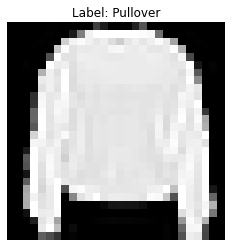

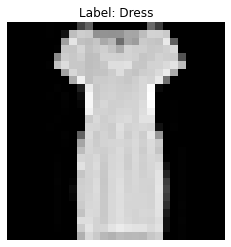

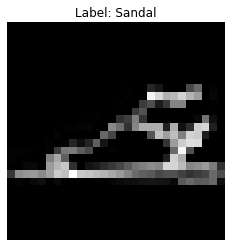

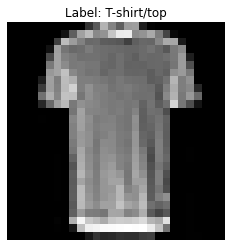

In [15]:
clothes = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot',
}
def predict_sample(n):
    sample = np.reshape(X_train[n], (1, 28, 28, 1))
    predicition = model.predict(sample)
    # print(np.argmax(predicition))
    clothes_label = clothes[np.argmax(predicition)]
    # print(clothes_label)
    plt.axis('off')
    plt.imshow(np.squeeze(sample), cmap='gray')
    plt.title('Label: %s' % clothes_label)
    plt.show()

predict_sample(7)
predict_sample(20)
predict_sample(300)
predict_sample(789)

## Recurrent Neural Networks(RNNs) 
### Sequence Prediction
### Simple RNN

In [49]:
import pandas as pd
import matplotlib.pylab as plt

timeseries = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_no_noise.csv')

# print(timeseries.shape)
print(timeseries)
# print(timeseries['timestamp'][0])
# print(timeseries['value'][0])
# print(timeseries['timestamp'].shape)

X = timeseries['timestamp']
Y = timeseries['value']

X.to_numpy()
Y.to_numpy()

X.shape

X = np.reshape(X,(4032,1))

                timestamp     value
0     2014-04-01 00:00:00  20.00000
1     2014-04-01 00:05:00  20.00000
2     2014-04-01 00:10:00  20.00000
3     2014-04-01 00:15:00  20.00000
4     2014-04-01 00:20:00  20.00000
...                   ...       ...
4027  2014-04-14 23:35:00  20.00384
4028  2014-04-14 23:40:00  20.00384
4029  2014-04-14 23:45:00  20.00384
4030  2014-04-14 23:50:00  20.00384
4031  2014-04-14 23:55:00  20.00384

[4032 rows x 2 columns]


Exception: Data must be 1-dimensional

In [ ]:
# timeseries_test = pd.sp

In [44]:
# TBD: Use a single layer single neuron RNN to make single step prediction for above timeseries 
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

model2 = Sequential()
model2.add(SimpleRNN(1, activation='relu', input_shape=X.shape))
# model2.
model2.summary()

# model.fit(timeseries['timestamp'], timeseries['value'], batch_size=12, epoch=3)
# model2(timeseries)

ValueError: Input 0 of layer simple_rnn_9 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 4032)

## Deep RNN

In [ ]:
# TBD: Use following RNN architecture to make single step prediction for given timeseries 
# Layer1 (10 Neurons)
# Layer2 (10 Neurons)
# Layer3 (1 Neurons) Output Layer

## Deep RNN (Multi step prediction)

In [ ]:
# TBD: Use following RNN architecture to make multi step prediction (5) for given timeseries 
# Layer1 (20 Neurons)
# Layer2 (20 Neurons)
# Layer3 (10 Neurons)
# Layer3 (5 Neurons) Output Layer